# Лабораторная 10. Кластеризация

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from pandas import DataFrame
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # PCA
from sklearn.preprocessing import scale # для предобработки изображений, масштаб
from time import time

In [20]:
df=pd.read_csv('CO2_emission.csv')
cols_drop = ['Model_Year','Make','Model', 'Transmission', 'Vehicle_Class', 'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions']
df = df.drop(columns=cols_drop)
X=df.iloc[:,:4]
y=df.iloc[:,4]
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
df = df_new_sm
df.head(10)

(1210, 4)
(935, 4)


,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Smog_Level
0,2.4,4,9.9,7.0,3
1,3.5,6,11.1,10.8,3
2,2.0,4,11.0,8.6,6
3,2.0,4,11.3,9.1,6
4,2.0,4,11.2,8.0,7
5,2.0,4,11.3,8.1,7
6,2.0,4,10.0,7.2,3
7,2.0,4,10.5,7.7,3
8,2.9,6,13.5,9.3,3
9,2.0,4,10.3,8.1,3


In [21]:
df['Категория'] = pd.cut(df['Smog_Level'], bins=[0, 2, 5, 7], labels=[0, 1, 2]).astype(int)
#from sklearn import preprocessing
#X_train = df.iloc[:,:4]
#X_normalized = preprocessing.normalize(X_train, norm='l2')
#frame = pd.DataFrame(X_normalized, columns = ['Engine_Size','Cylinders','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)'])
#frame['Категория'] = df['Категория']
#df = frame
df.head(5)

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Smog_Level,Категория
0,2.4,4,9.9,7.0,3,1
1,3.5,6,11.1,10.8,3,1
2,2.0,4,11.0,8.6,6,2
3,2.0,4,11.3,9.1,6,2
4,2.0,4,11.2,8.0,7,2


In [22]:
X = np.array(df.iloc[:,:4])
#y = np.array(df.iloc[:,4])
y = np.array(df.iloc[:,5])
X

array([[ 2.4       ,  4.        ,  9.9       ,  7.        ],
       [ 3.5       ,  6.        , 11.1       , 10.8       ],
       [ 2.        ,  4.        , 11.        ,  8.6       ],
       ...,
       [ 2.5       ,  4.        , 12.49048426,  9.58731234],
       [ 6.58233781, 12.        , 27.83961894, 15.74940269],
       [ 6.5       , 12.        , 27.9       , 15.7       ]])

In [23]:
# настройка K-Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)
# Вычислить центры кластеров и спрогнозировать индекс кластера для каждой выборки.
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
# центры кластеров
print(kmeans.cluster_centers_)

[[ 2.43250379  4.63649025 10.70982688  8.22963158]
 [ 6.31999922 11.25       25.67407966 16.11498699]
 [ 5.06870679  7.96100917 16.48696469 11.4193732 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


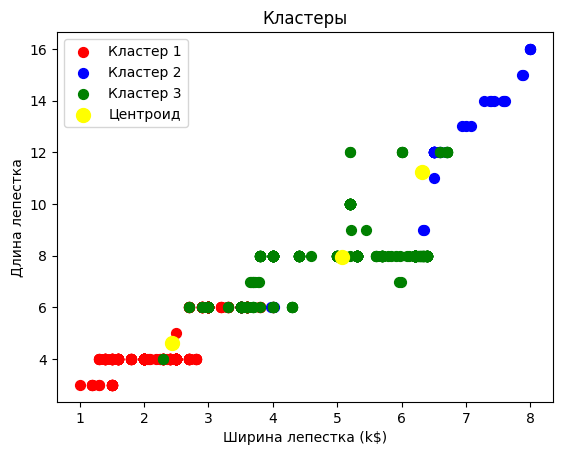

In [24]:
# визуализация кластеров
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label =
'Центроид')
plt.title('Кластеры')
plt.xlabel('Ширина лепестка (k$)')
plt.ylabel('Длина лепестка')
plt.legend(loc='best')
plt.show()

In [25]:
kl=kmeans.labels_.reshape(-1,1)
y_new=y.reshape(-1, 1)
z=np.hstack((X, y_new, kl))
z=DataFrame(z,columns=['Engine_Size',
                       'Cylinders',
                       'Fuel_Consumption_in_City(L/100 km)',
                       'Fuel_Consumption_in_City_Hwy(L/100 km)',
                       'Категория',
                       'claster'])
z

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Категория,claster
0,2.400000,4.0,9.900000,7.000000,1.0,0.0
1,3.500000,6.0,11.100000,10.800000,1.0,0.0
2,2.000000,4.0,11.000000,8.600000,2.0,0.0
3,2.000000,4.0,11.300000,9.100000,2.0,0.0
4,2.000000,4.0,11.200000,8.000000,2.0,0.0
...,...,...,...,...,...,...
1205,5.200000,10.0,17.473271,11.429721,0.0,2.0
1206,6.297576,8.0,15.234247,9.241517,0.0,2.0
1207,2.500000,4.0,12.490484,9.587312,0.0,0.0
1208,6.582338,12.0,27.839619,15.749403,0.0,1.0


## Расчет метрик

In [26]:
# функция для расчета метрик
def bench_k_means(estimator, name, data):
    # принимает кластеризатор, его название, данные
    t0 = time() # старт таймера
    estimator.fit(data) # обучаем кластеризатор
    # вычисляем метрики и отображаем их
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [27]:
data = scale(X) # предобработка, масштабируем данные, приводя к нулевому среднему и единичной дисперсии

n_samples, n_features = data.shape # число примеров и число признаков
n_digits = len(np.unique(y)) # число уникальных классов
labels = y

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

# заголовок для таблички результатов
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# тест для k-means в котором используется улучшенный выбор начальной расстановки центроидов
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
# тест для k-means  в котором центроиды изначально выбраны случайно из данных
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# тест для k-means  в котором начальные центроиды выбраны как главные компоненты PCA
pca = PCA(n_components=n_digits).fit(data) # вычисляем главные компоненты
bench_k_means(KMeans(init=pca.components_, # используем главные компоненты как начальные положения центроидов
                     n_clusters=n_digits, n_init=1), # здесь начальные положения центроидов не изменяются, поэтому только 1 раз делаем кластеризацию
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 3, 	 n_samples 1210, 	 n_features 4
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	1204	0.119	0.154	0.134	0.083	0.133	0.564
random   	0.03s	1205	0.118	0.152	0.133	0.083	0.131	0.542
PCA-based	0.12s	1363	0.163	0.157	0.160	0.120	0.159	0.416
__________________________________________________________________________________
